In [ ]:
# IMPORTING THE DEPENDENCIES

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
# CREATING THE NEURAL NETWORK

In [2]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=2,activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# STORING VALUE PREREQUISITES FOR IMAGE RESIZING AND RESCALING

In [6]:
images=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

In [ ]:
# DECLARATION OF DIRECTORY

In [7]:
train_data=images.flow_from_directory(
    "train",
    target_size=(64,64),
    batch_size= 10,
    class_mode="categorical"
    
)
test_data=images.flow_from_directory(
    "test",
    target_size=(64,64),
    batch_size=10,
    class_mode="categorical"
)

Found 501 images belonging to 2 classes.
Found 549 images belonging to 2 classes.


In [ ]:
# FITTING THE DATA INTO THE MODEL

In [8]:
history=classifier.fit_generator(
    train_data,
    epochs=40,
    steps_per_epoch=50,
    validation_data=test_data,
    validation_steps=20
)

C:\Users\Mudit\AppData\Local\Temp\ipykernel_12292\1077553783.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(


Epoch 1/40


50/50 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5479

C:\Users\Mudit\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 9s 147ms/step - loss: 0.6951 - accuracy: 0.5479 - val_loss: 0.6918 - val_accuracy: 0.4850
Epoch 2/40
50/50 [==============================] - 2s 48ms/step - loss: 0.6870 - accuracy: 0.5662 - val_loss: 0.6884 - val_accuracy: 0.5400
Epoch 3/40
50/50 [==============================] - 2s 47ms/step - loss: 0.6823 - accuracy: 0.5356 - val_loss: 0.6564 - val_accuracy: 0.6200
Epoch 4/40
50/50 [==============================] - 2s 38ms/step - loss: 0.6694 - accuracy: 0.5866 - val_loss: 0.6880 - val_accuracy: 0.5650
Epoch 5/40
50/50 [==============================] - 2s 39ms/step - loss: 0.6572 - accuracy: 0.5988 - val_loss: 0.7318 - val_accuracy: 0.5950
Epoch 6/40
50/50 [==============================] - 2s 38ms/step - loss: 0.6800 - accuracy: 0.5723 - val_loss: 0.7360 - val_accuracy: 0.5100
Epoch 7/40
50/50 [==============================] - 2s 36ms/step - loss: 0.6437 - accuracy: 0.6273 - val_loss: 0.7107 - val_accuracy: 0.6150
Epoch 8/40
50/50 [=====

In [ ]:
# GRAPHICAL REPRESENTATION FOR TRAINING AND VALIDATION ACCURACY

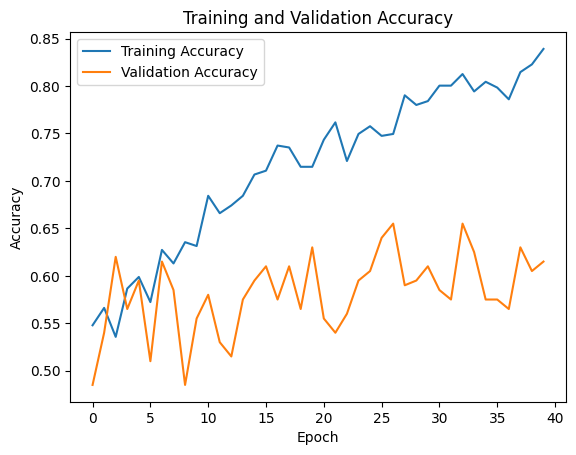

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# TESTING ON RANDOM DATA

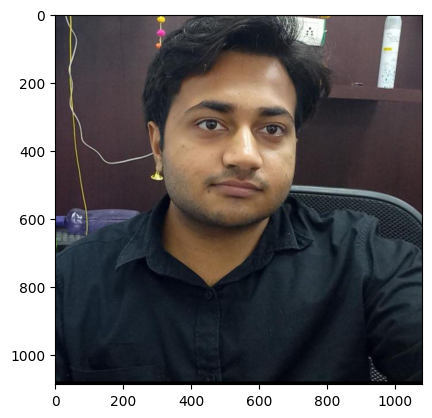

1/1 [==============================] - 0s 134ms/step
{'fake': 0, 'real': 1}
[[0. 1.]]


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('test/shubham.png')
imgplot = plt.imshow(img)
plt.show()

myimg=image.load_img("test/shubham.png",target_size=(64,64))
myimg=image.img_to_array(myimg)
myimg=np.expand_dims(myimg, axis=0)
result=classifier.predict(myimg)
print(train_data.class_indices)
print(result)

In [29]:
print("hello")

hello


In [14]:
import tensorflow as tf
converter=tf.lite.TFLiteConverter.from_keras_model(classifier)
tflite_model=converter.convert()

with open("model.tflite","wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Mudit\AppData\Local\Temp\tmpm7susa43\assets


INFO:tensorflow:Assets written to: C:\Users\Mudit\AppData\Local\Temp\tmpm7susa43\assets
